In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
import pickle
import copy

In [85]:
#Setting the seed to main consistency across models for comparison
np.random.seed(5)

In [3]:
connect_data = pd.read_csv("connectfour.data")

In [4]:
connect_data

,b,b.1,b.2,b.3,b.4,b.5,b.6,b.7,b.8,b.9,...,b.25,b.26,b.27,b.28,b.29,b.30,b.31,b.32,b.33,win
0,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
1,b,b,b,b,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,win
2,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
3,o,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
4,b,b,b,b,b,b,b,b,b,b,...,b,b,b,o,b,b,b,b,b,win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67551,x,x,b,b,b,b,o,x,o,b,...,b,b,b,o,o,x,b,b,b,loss
67552,x,x,b,b,b,b,o,b,b,b,...,b,b,b,o,x,o,o,x,b,draw
67553,x,x,b,b,b,b,o,o,b,b,...,b,b,b,o,x,x,o,b,b,loss
67554,x,o,b,b,b,b,o,b,b,b,...,b,b,b,o,x,o,x,x,b,draw


In [194]:
#1 is player X, 0 is player O (second player) -1 is blank
def function_to_num(array):
    array=array.reshape(42,)
    #print(array)
    for i in range(len(array)):
        if array[i]=='b':
            array[i]=-1
        elif array[i]=='x':
            array[i]=1
        else:
            array[i]=0
    return array.tolist()

In [84]:
#Return those states where X loses

In [72]:
#X win is 1, X lose is 0, Game draw is -1
X=[]
y=[]
for i in range(connect_data.shape[0]):
    x_row=np.array(connect_data.iloc[i:i+1,:42])
    x=function_to_num(x_row)
    X.append(x)
    y_row=np.array(connect_data.iloc[i:i+1,42:43])[0][0]
    if y_row=='win':
        y.append(1)
    elif y_row=='loss':
        y.append(0)
    else:
        y.append(-1)
X=np.array(X)
y=np.array(y)

In [86]:
X

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [ 1,  1, -1, ...,  0, -1, -1],
       [ 1,  0, -1, ...,  1,  1, -1],
       [ 1,  0,  0, ..., -1, -1, -1]])

In [87]:
y

array([ 1,  1,  1, ...,  0, -1, -1])

In [88]:
#Performing train, test, val split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,train_size=0.75,shuffle=True)

In [109]:
#Hyperparameter tuning (Finding the right combination of parameters by validation)
activations=['relu','tanh','logistic']
solvers=['adam','sgd']
learning_rates=['constant','adaptive']
learning_rate_inits=[0.001,0.01]
validation_error=[]
for activation in activations:
    for solver in solvers:
        for learning_rate in learning_rates:
            for learning_rate_init in learning_rate_inits:
                params={'hidden_layer_sizes':(150,100,50),'activation':activation,'solver':solver,'max_iter':1000,'learning_rate':learning_rate,
    'learning_rate_init':learning_rate_init}
                print("The parameters are:")
                print(params)
                mlp_classifier=MLPClassifier(hidden_layer_sizes=(150,100,50),activation=activation,solver=solver,max_iter=1000,learning_rate=learning_rate,
    learning_rate_init=learning_rate_init,shuffle=True,random_state=37)
                clf.fit(X_train,y_train)
                error=1-np.mean(clf.predict(X_val)==y_val)
                validation_error.append(error)
                print("The validation error is: {}".format(error))
                print('**************')

The parameters are:
{'hidden_layer_sizes': (150, 100, 50), 'activation': 'relu', 'solver': 'adam', 'max_iter': 1000, 'learning_rate': 'constant', 'learning_rate_init': 0.001}
The validation error is: 0.20390792687439863
**************
The parameters are:
{'hidden_layer_sizes': (150, 100, 50), 'activation': 'relu', 'solver': 'adam', 'max_iter': 1000, 'learning_rate': 'constant', 'learning_rate_init': 0.01}
The validation error is: 0.20635038117089777
**************
The parameters are:
{'hidden_layer_sizes': (150, 100, 50), 'activation': 'relu', 'solver': 'adam', 'max_iter': 1000, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001}
The validation error is: 0.2095329731330028
**************
The parameters are:
{'hidden_layer_sizes': (150, 100, 50), 'activation': 'relu', 'solver': 'adam', 'max_iter': 1000, 'learning_rate': 'adaptive', 'learning_rate_init': 0.01}
The validation error is: 0.20805269780179114
**************
The parameters are:
{'hidden_layer_sizes': (150, 100, 50), 'act

Accuracy of MLP Classifier on Connect dataset is 0.8848431024274719
******
Confusion matrix


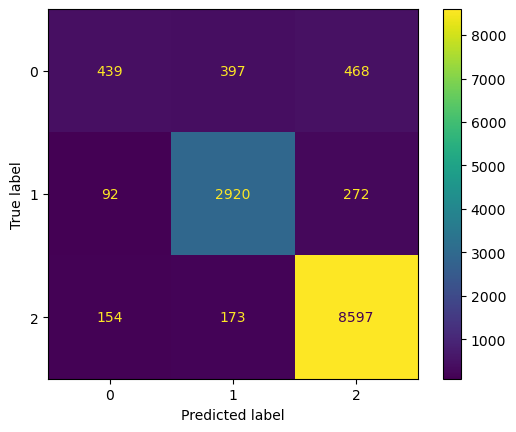

******
Normalized confusion matrix
[[0 0 0]
 [0 0 0]
 [0 0 0]]


In [110]:
#Finding accuracy of best MLP Classifier on test data
#{'hidden_layer_sizes': (150, 100, 50), 'activation': 'relu', 'solver': 'sgd', 'max_iter': 1000, 'learning_rate': 'constant', 'learning_rate_init': 0.001}
final_model=MLPClassifier(hidden_layer_sizes=(150,100,50),activation='relu',solver='sgd',max_iter=1000,learning_rate='constant',
    learning_rate_init=0.001,shuffle=True,random_state=37)
final_model.fit(X_test,y_test)
test_error=1-np.mean(final_model.predict(X_test)==y_test)
y_pred=final_model.predict(X_test)
print("Accuracy of MLP Classifier on Connect dataset is {}".format(1-test_error))
print("******")
print("Confusion matrix")
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_pred))
cm_display.plot()
plt.show()
print("******")

In [117]:
filename = 'mlp_classifier_connect_4'
pickle.dump(final_model, open(filename, 'wb'))

In [264]:
#input state to the function is a given state of the board after X player plays the move
#This input state is 6*7 matrix

In [ ]:
def function2_to_num(array):
    array=np.array(array)
    array=array.reshape(42,)
    print(array)
    for i in range(len(array)):
        if array[i]=='b':
            array[i]=-1
            print(array)
        elif array[i]=='x':
            array[i]=int(1)
        else:
            array[i]=0
    print(array)
    return array.tolist()

In [193]:
def function_to_alphabet(array):
    array=np.array(array)
    array=array.reshape(42,)
    #print(array)
    for i in range(len(array)):
        if array[i]==-1:
            array[i]='b'
        elif array[i]==1:
            array[i]='x'
        else:
            array[i]='o'
    #return array.tolist()
    return np.array(array)

In [133]:
loaded_model = pickle.load(open(filename, 'rb'))

In [260]:
def bot_playing_game(state,model):
    state=np.array(state,dtype=object)
    state=function_to_num(state)
    state=np.array(state)
    possible_new_state=[]
    all_indices=[]
    for i in range(7):
        for step in range(6):
            index=(41-i)-(7*step)
            if state[index]==-1:
                all_indices.append(index)
                break
    for i in all_indices:
        if state[i]==-1:
            possible_new_state=copy.deepcopy(state)
            possible_new_state[i]=0
            pred_state=np.expand_dims(possible_new_state, axis=0)
            if model.predict(pred_state)==1:
                break
    possible_new_state=np.array(possible_new_state,dtype=object)
    return_state=np.array(function_to_alphabet(possible_new_state))
    return_state=return_state.reshape(6,7)
    return return_state

In [262]:
human_move=[['b', 'b', 'b', 'b', 'b', 'b', 'b'],
       ['b', 'b', 'b', 'b', 'b', 'b', 'b'],
       ['b', 'b', 'b', 'b', 'b', 'b', 'b'],
       ['b', 'b', 'b', 'b', 'b', 'b', 'b'],
       ['b', 'b', 'b', 'b', 'b', 'b', 'b'],
       ['b', 'b', 'b', 'b', 'x', 'b', 'b']]

In [263]:
bot_playing_game(human_move,loaded_model)

array([['b', 'b', 'b', 'b', 'b', 'b', 'b'],
       ['b', 'b', 'b', 'b', 'b', 'b', 'b'],
       ['b', 'b', 'b', 'b', 'b', 'b', 'b'],
       ['b', 'b', 'b', 'b', 'b', 'b', 'b'],
       ['b', 'b', 'b', 'b', 'b', 'b', 'b'],
       ['b', 'b', 'b', 'b', 'x', 'b', 'o']], dtype=object)